# Cyclistic Bike Share Analysis
### March 25, 2023
### Justin Smith

## Import Libraries 

In [ ]:
#Lets Import our libraries 
library(easypackages)
library(readxl)
libraries(c("tidyverse", "ggthemes", "janitor","lubridate","MASS", "ISLR"))
libraries(c("scales","readr","chron"))
library(multidplyr)
library(data.table)


In [2]:
setwd("~/Library/CloudStorage/OneDrive-GeorgiaStateUniversity/Data Portfolio Project/12_Months")


## Importing the Data

In [3]:
#Let's import our data frames 
df = read.csv("202203-divvy-tripdata.csv")
df2 = read.csv("202204-divvy-tripdata.csv")
df3 = read.csv("202205-divvy-tripdata.csv")
df4 = read.csv("202206-divvy-tripdata.csv")
df5 = read.csv("202207-divvy-tripdata.csv")
df6 = read.csv("202208-divvy-tripdata.csv")
df7 = read.csv("202209-divvy-publictripdata.csv")
df8 = read.csv("202210-divvy-tripdata.csv")
df9 = read.csv("202211-divvy-tripdata.csv")
df10 = read.csv("202212-divvy-tripdata.csv")
df11 = read.csv("202301-divvy-tripdata.csv")
df12 = read.csv("202202-divvy-tripdata.csv")

#### Convert these 12 data frames into a singular one

In [4]:
##Convert the 12 data frames into a singular one 
bike_rides = rbind(df,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12)
bike_rides = remove_empty(bike_rides, which = c("rows","cols"))


In [5]:
str(bike_rides)

'data.frame':	5754248 obs. of  13 variables:
 $ ride_id           : chr  "47EC0A7F82E65D52" "8494861979B0F477" "EFE527AF80B66109" "9F446FD9DEE3F389" ...
 $ rideable_type     : chr  "classic_bike" "electric_bike" "classic_bike" "classic_bike" ...
 $ started_at        : chr  "2022-03-21 13:45:01" "2022-03-16 09:37:16" "2022-03-23 19:52:02" "2022-03-01 19:12:26" ...
 $ ended_at          : chr  "2022-03-21 13:51:18" "2022-03-16 09:43:34" "2022-03-23 19:54:48" "2022-03-01 19:22:14" ...
 $ start_station_name: chr  "Wabash Ave & Wacker Pl" "Michigan Ave & Oak St" "Broadway & Berwyn Ave" "Wabash Ave & Wacker Pl" ...
 $ start_station_id  : chr  "TA1307000131" "13042" "13109" "TA1307000131" ...
 $ end_station_name  : chr  "Kingsbury St & Kinzie St" "Orleans St & Chestnut St (NEXT Apts)" "Broadway & Ridge Ave" "Franklin St & Jackson Blvd" ...
 $ end_station_id    : chr  "KA1503000043" "620" "15578" "TA1305000025" ...
 $ start_lat         : num  41.9 41.9 42 41.9 41.9 ...
 $ start_lng         : nu

### Correct Misformatted Data
We see from the structure of the data that the times we will be using for our analysis are shown as a character data type, therefore we must change it to a Date/Time data type

In [6]:
##Convert Date/Time stamp to Date Time
bike_rides$started_at = ymd_hms(bike_rides$started_at)
bike_rides$ended_at = ymd_hms(bike_rides$ended_at)

bike_rides$start_hour = hour(bike_rides$started_at)
bike_rides$end_hour = hour(bike_rides$ended_at)

bike_rides$start_date = date(bike_rides$started_at)
bike_rides$end_date = date(bike_rides$ended_at)
bike_rides$Ymd = as.Date(bike_rides$started_at)


In [7]:
##Let's check the structure of our data frame again to see if it is in the correct format
str(bike_rides)

'data.frame':	5754248 obs. of  18 variables:
 $ ride_id           : chr  "47EC0A7F82E65D52" "8494861979B0F477" "EFE527AF80B66109" "9F446FD9DEE3F389" ...
 $ rideable_type     : chr  "classic_bike" "electric_bike" "classic_bike" "classic_bike" ...
 $ started_at        : POSIXct, format: "2022-03-21 13:45:01" "2022-03-16 09:37:16" ...
 $ ended_at          : POSIXct, format: "2022-03-21 13:51:18" "2022-03-16 09:43:34" ...
 $ start_station_name: chr  "Wabash Ave & Wacker Pl" "Michigan Ave & Oak St" "Broadway & Berwyn Ave" "Wabash Ave & Wacker Pl" ...
 $ start_station_id  : chr  "TA1307000131" "13042" "13109" "TA1307000131" ...
 $ end_station_name  : chr  "Kingsbury St & Kinzie St" "Orleans St & Chestnut St (NEXT Apts)" "Broadway & Ridge Ave" "Franklin St & Jackson Blvd" ...
 $ end_station_id    : chr  "KA1503000043" "620" "15578" "TA1305000025" ...
 $ start_lat         : num  41.9 41.9 42 41.9 41.9 ...
 $ start_lng         : num  -87.6 -87.6 -87.7 -87.6 -87.6 ...
 $ end_lat           : num 

### Exploratory Data Analysis 

In [8]:
##Create a column called days of the week 
bike_rides$day_of_week = weekdays(bike_rides$start_date, abbreviate = T) %>% factor(levels = c("Sun","Mon","Tue","Wed","Thu","Fri","Sat"),
                                                           labels = c(1,2,3,4,5,6,7))

In [9]:
##Create a function that gets the mode day of the week
getmode = function(x){
    uniqx = unique(x)
    uniqx[which.max(tabulate(match(x,uniqx)))]
}


In [10]:
getmode(bike_rides$day_of_week)

[1] 7
Levels: 1 2 3 4 5 6 7

I created a column that converted the date from the start date to the day of the week, then factored these days into 7 levels to represent 7 days of the week(1 = Sunday, 2 = Monday, 3 = Tuesday, 4 = Wednesday, 5 = Thursday, 6 = Friday, 7 = Saturday). I want to figure out what day of the week occured the most for people to use a bike. Since R does not have a mode function, I created one that would take the unique variable and match it to the max number of times it occurs in the column. Turns out people love to take bike rides on Saturdays!

In [11]:
##Get the Duration 
bike_rides$start_time = format(bike_rides$started_at, format = "%H:%M:%S")
bike_rides$end_time = format(bike_rides$ended_at, format = "%H:%M:%S")
bike_rides = bike_rides %>% mutate("Duration" = difftime(ended_at,started_at, units = "mins"))

bike_rides$minutes = difftime(bike_rides$ended_at,bike_rides$started_at, units = "mins")
bike_rides$hours = difftime(bike_rides$ended_at,bike_rides$started_at, units = "hours")

In [12]:
##Convert Time from character to actual Time 
bike_rides$start_time = chron(time = bike_rides$start_time)
bike_rides$end_time = chron(time = bike_rides$end_time)

In [13]:
##Now lets create a new data frame with duration greater than 0
bike_rides1 = bike_rides %>% filter(hours > 0) %>% drop_na() %>% 
  dplyr::select(-ride_id,-end_station_id,-start_station_id)

In [14]:
str(bike_rides1)

'data.frame':	5747815 obs. of  21 variables:
 $ rideable_type     : chr  "classic_bike" "electric_bike" "classic_bike" "classic_bike" ...
 $ started_at        : POSIXct, format: "2022-03-21 13:45:01" "2022-03-16 09:37:16" ...
 $ ended_at          : POSIXct, format: "2022-03-21 13:51:18" "2022-03-16 09:43:34" ...
 $ start_station_name: chr  "Wabash Ave & Wacker Pl" "Michigan Ave & Oak St" "Broadway & Berwyn Ave" "Wabash Ave & Wacker Pl" ...
 $ end_station_name  : chr  "Kingsbury St & Kinzie St" "Orleans St & Chestnut St (NEXT Apts)" "Broadway & Ridge Ave" "Franklin St & Jackson Blvd" ...
 $ start_lat         : num  41.9 41.9 42 41.9 41.9 ...
 $ start_lng         : num  -87.6 -87.6 -87.7 -87.6 -87.6 ...
 $ end_lat           : num  41.9 41.9 42 41.9 41.9 ...
 $ end_lng           : num  -87.6 -87.6 -87.7 -87.6 -87.7 ...
 $ member_casual     : chr  "member" "member" "member" "member" ...
 $ start_hour        : int  13 9 19 19 18 17 17 12 17 19 ...
 $ end_hour          : int  13 9 19 19 19 1

We don't want to observe data that has a trip duration that is less than or equal to 0 because this wouldn't be relevant to the problem we are trying to solve. I went on to create a data frame that selected relevant data and where the duration is greater than 0.  

## Create Summary Data Frames 

In [15]:
 ##Creating a summary data frame using data.table
bike_rides1 = as.data.table(bike_rides1)


In [16]:
summary_bikes = bike_rides1[, .(Total_ride_length = sum(minutes), Avg_ride_length = mean(minutes),
                                Median_ride_length = median(minutes),
                                Max_ride_length = max(minutes),
                                Min_ride_length = min(minutes), Count = .N), by = .(Ymd,start_time)]


In [17]:
##Grouping by rideable type
biketype = bike_rides1[, .(Total_ride_length = sum(minutes), Avg_ride_length = mean(minutes), # nolint
                           Median_ride_length = median(minutes),
                           Max_ride_length = max(minutes),
                           Min_ride_length = min(minutes), Count = .N), by = .(rideable_type,Ymd)]

In [18]:
##Grouping by day of the week 
bike_days = bike_rides1[, .(Total_ride_length = sum(minutes), Avg_ride_length = mean(minutes),
                            Median_ride_length = median(minutes), Max_ride_length = max(minutes),
                            Min_ride_length = min(minutes), Count = .N), by = .(day_of_week,Ymd)]

I want to create 3 different data frames, each one will highlight a specific attribute I want to analyze the data with. The first one being summary bikes, which will look at some summary statistics and compare that by the the date and start time. Next, biketype will be a data frame that groups all of the summary statistics we found by the rideable type of the bikes. Finally, I want to create a data frame that groups all the summary statistics by day of the week.

## Data Visualization

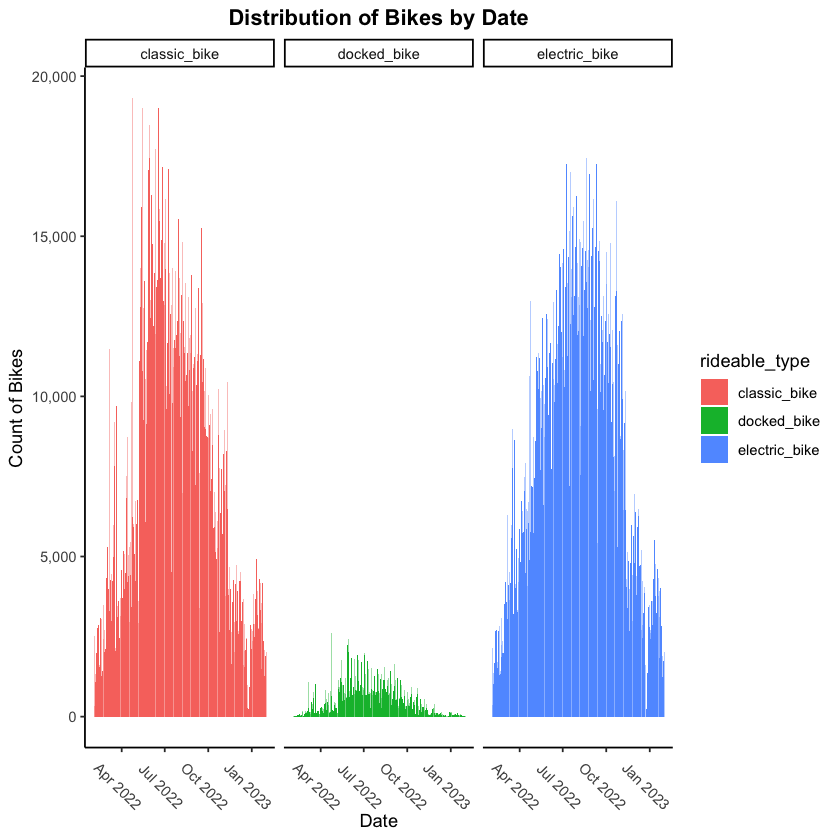

In [19]:
## Now lets do some data visualization 
ggplot(biketype, aes(x = Ymd, y = Count))+ geom_bar(aes(fill = rideable_type), stat = 'identity')+
facet_wrap(~rideable_type)+scale_y_continuous(labels = comma)+ labs(title = "Distribution of Bikes by Date", x = "Date", y = "Count of Bikes")+
theme_classic()+
theme(axis.text.x = element_text(angle = -45), plot.title = element_text(hjust = 0.5, face = 'bold'))

The visual takes a look at the distribution of bikes based on the month. From the visual you can see that there are more classic bikes than there are any of the other types of bikes, with eletric bikes coming in second, and docked bikes coming in last.

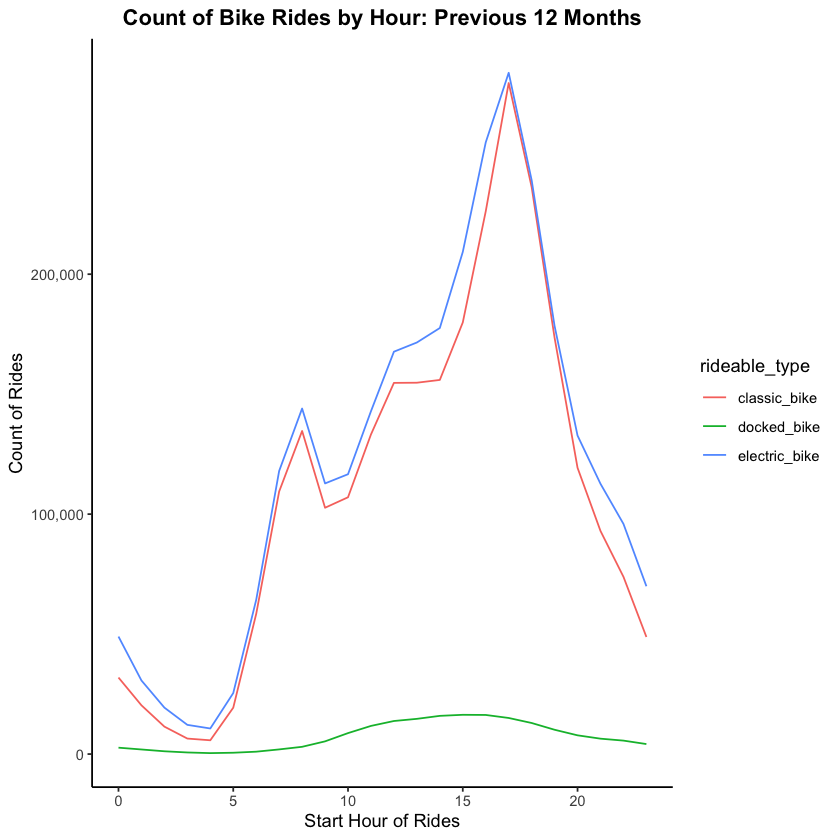

In [20]:
##Calculate Trip Duration by hour
bike_rides %>% count(start_hour, rideable_type, sort = T) %>% 
  ggplot() + geom_line(aes(x=start_hour,y=n, color = rideable_type)) + 
  scale_y_continuous(labels = comma)+
labs(title = "Count of Bike Rides by Hour: Previous 12 Months",x="Start Hour of Rides", y = "Count of Rides")+
theme_classic()+
theme(plot.title = element_text(hjust = 0.5, face = 'bold'))

Here we can look at the start hour of bike rides compared to the total count of available rides. It is also seperated by the type of bikes avaialble. From the chart that we've created we can see that there is a steady increase in the count of classic and electric bikes as it gets later in the day then plateus around 6 PM. Docked bikes are rarely used at any time of day.

In [21]:
##Now that we have the count, let's look at the average amount of time each bike type was used 
bikes2 = bike_rides1[, .(Avg_rides = mean(minutes)), by = .(member_casual, rideable_type)] 


Don't know how to automatically pick scale for object of type <difftime>.
Defaulting to continuous.


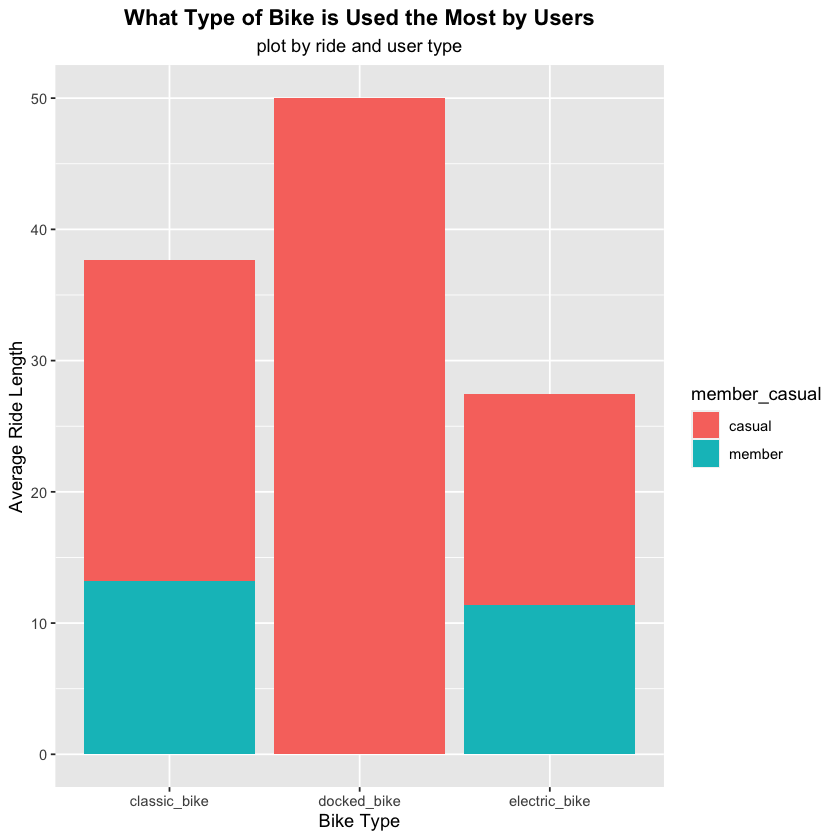

In [22]:
ggplot(bikes2, aes(x = rideable_type, y = Avg_rides)) + geom_bar(stat = 'identity', aes(fill = member_casual))+
labs(title = "What Type of Bike is Used the Most by Users", subtitle= "plot by ride and user type",
y = "Average Ride Length", x = "Bike Type")+
theme(plot.title = element_text(hjust = 0.5, face = 'bold'), plot.subtitle = element_text(hjust = 0.5))

I created a bar chart that showed which bike type is used frequently by users. It is interesting to see how in the previous chart created, it showed that docked bikes had the smallest amount used throughout the day, but our chart here shows that when they are used then they are used for the longest amount of time. It also shows that casual members use any type of bikes the longest. 

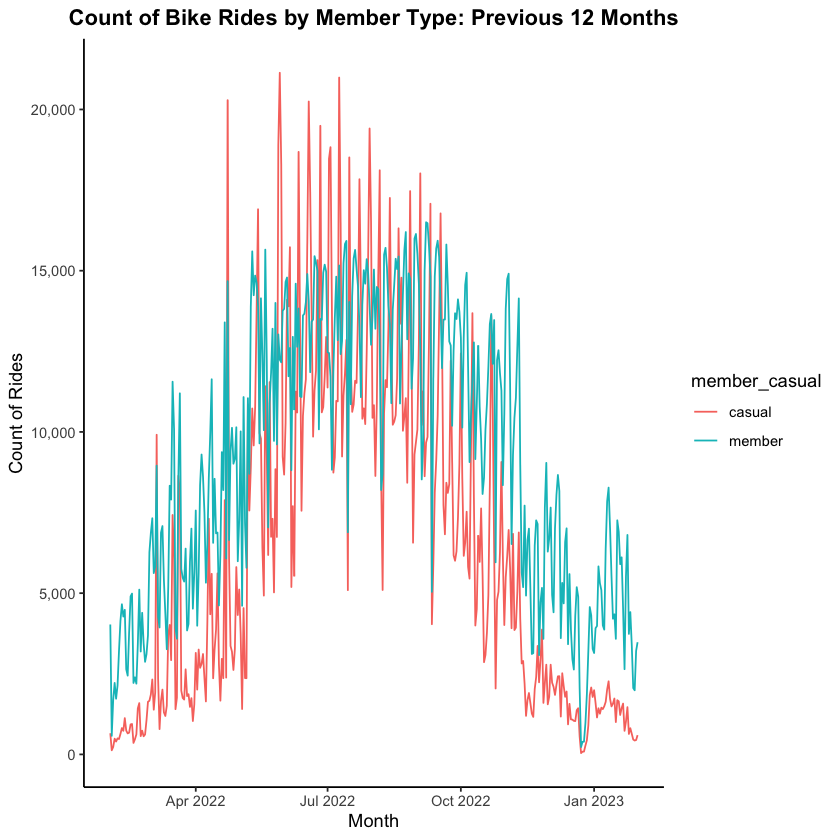

In [23]:
##Count of Rides by Member Type
bike_rides %>% count(Ymd, member_casual, sort = T) %>% 
  ggplot() + geom_line(aes(x=Ymd,y=n, color = member_casual)) + 
  scale_y_continuous(labels = comma)+
labs(title = "Count of Bike Rides by Member Type: Previous 12 Months",x="Month", y = "Count of Rides")+
theme_classic()+
theme(plot.title = element_text(hjust = 0.5, face = 'bold'))

The line chart above shows the count of bike rides by member type in the previous 12 months. From the chart you can see that the line progressively increases in the summer then drops when it gets into the fall and winter months. Once again we can see the pattern of casual members having the highest usage of bikes, the best time being in July.    

In [24]:
##Calculate the count of rides by the day of the week
p = ggplot(bike_days, aes(x = day_of_week, y = Count)) + geom_boxplot()

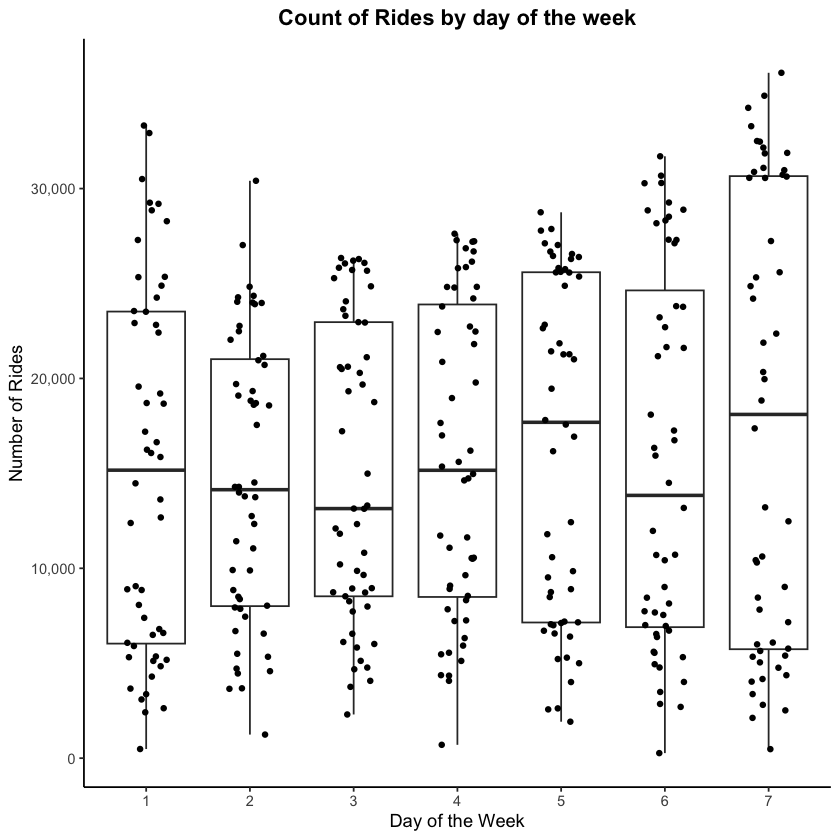

In [25]:
p + geom_jitter(shape = 16, position = position_jitter(0.2))+
scale_y_continuous(labels = comma)+labs(title = "Count of Rides by day of the week",x = "Day of the Week", y = "Number of Rides")+
theme_classic()+
theme(plot.title = element_text(hjust = 0.5, vjust = 1, face = 'bold'))

This visual represents the count of rides compared to the day of the week. Each day of the week seems to have around the same minimum number of rides, however you are able to see that the median fluctuates throughout the week. With saturday having the highest median, and overall the highest range of values out of the week. This tells me that saturday experiences the highest number of rides throughout the week.

## Data Changelog 
- Total Rows: 5,753,714
- There was a concern with the data, in which I raised to Lily Moreno (Director of Marketing)
- More than 5,000 rows with negative trip duration 
- I collaborated with Lily Moreno to see if we could ignore the rows that had trip durations with negative times.
- There were only a couple of rows that had missing data,but they were not relevant to the business task. 
- cleaning reduced rows to 5,747,815 rows